In [1]:
suppressPackageStartupMessages({
	library(gplots)
	library(gridExtra)
	library(knitr)
	library(NanoStringNCTools)
	library(RColorBrewer)
	library(grid)
	library(gridExtra)
    library(NanoStringNCTools)
    library(plotly)
    library(knitr)
    library(GeomxTools)
    library(GeoMxWorkflows)
    library(gplots)
    library(ggplot2)
    library(scales)
    library(dplyr)
    library(ggforce)
    library(AnnotationDbi)
    library(org.Hs.eg.db)
    library(clusterProfiler)
    library(plyr)
    # library(tidyverse)
    library(openxlsx)
    library(limma)
    library(DESeq2)
    library(lme4)
    library(edgeR)
    library(aliases2entrez)
    library(biomaRt)
    HGNC <- update_symbols()
    source('geomx_helper_functions.R')

})

Warning message:
“package ‘knitr’ was built under R version 4.4.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.4.3”
Warning message:
“package ‘scales’ was built under R version 4.4.3”
Warning message:
“package ‘DESeq2’ was built under R version 4.4.3”
Warning message:
“package ‘lme4’ was built under R version 4.4.3”
Warning message:
“package ‘Matrix’ was built under R version 4.4.3”
Fetching url...

Accessing data...

Rows: 49819 Columns: 6
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): Approved symbol, Status, Previous symbols, Alias symbols, Ensembl g...
dbl (1): NCBI Gene ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Checking validity...

done...

Warning message:
“p

In [9]:
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
green <- "#00B050"
red <- "#D40000"
blue <- "#00B0F0"
segment_palette <- c(red,blue,green)
load("target_demoData.RData")

# Add categories to scores ck_score, cd68_score and cd45_score into low, mid and high categories
pData(target_demoData) <- add_score_cat(pData(target_demoData),'cd68')
pData(target_demoData) <- add_score_cat(pData(target_demoData),'cd45')
pData(target_demoData) <- add_score_cat(pData(target_demoData),'ck')

# UMAPs

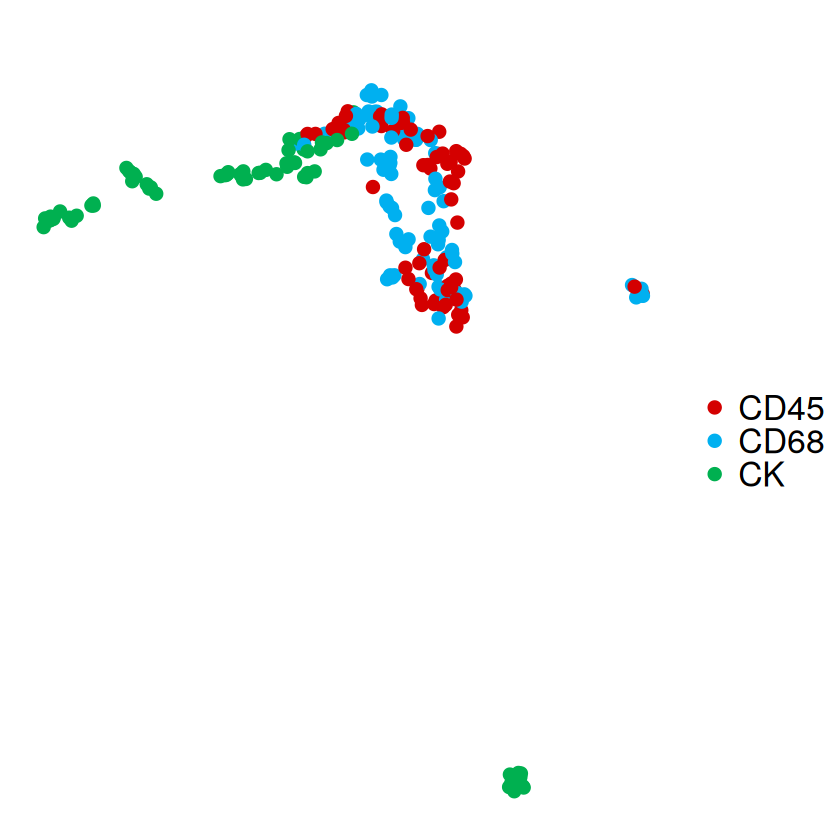

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’



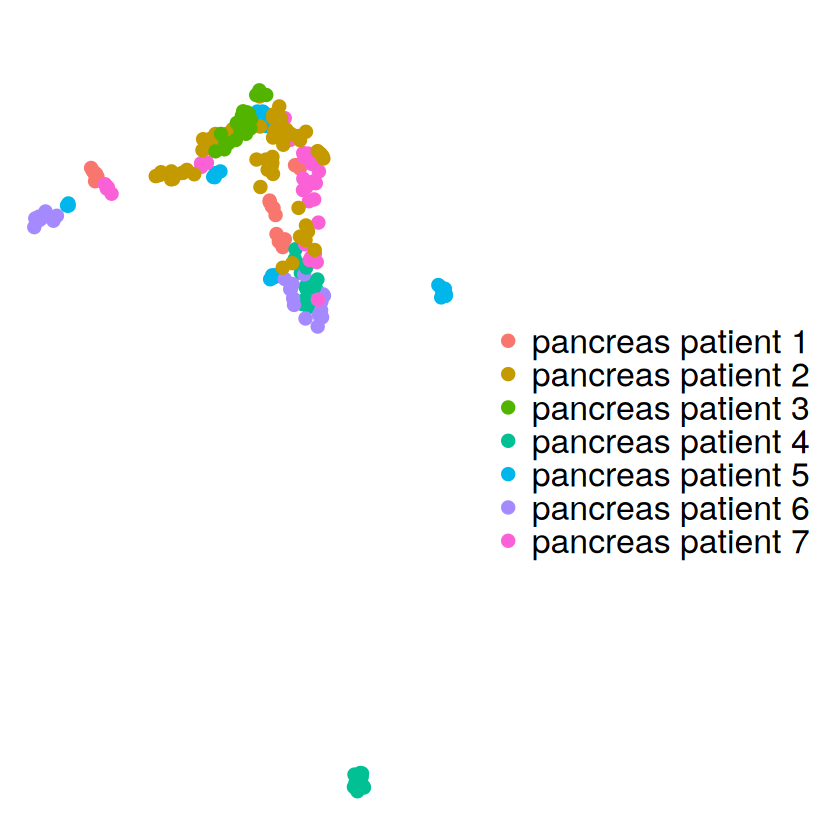

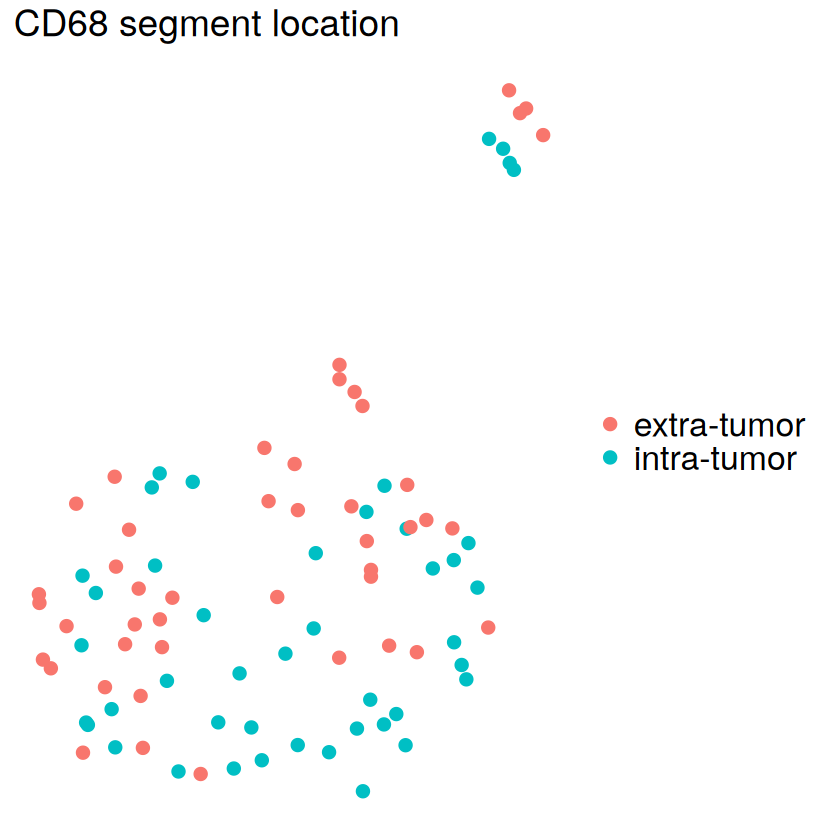

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’



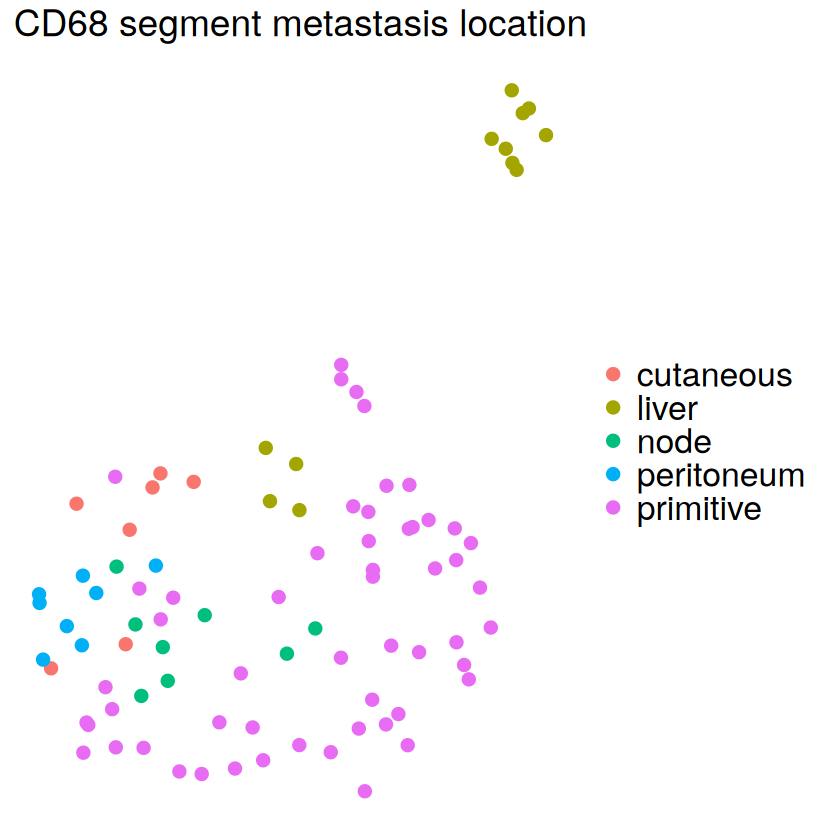

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’



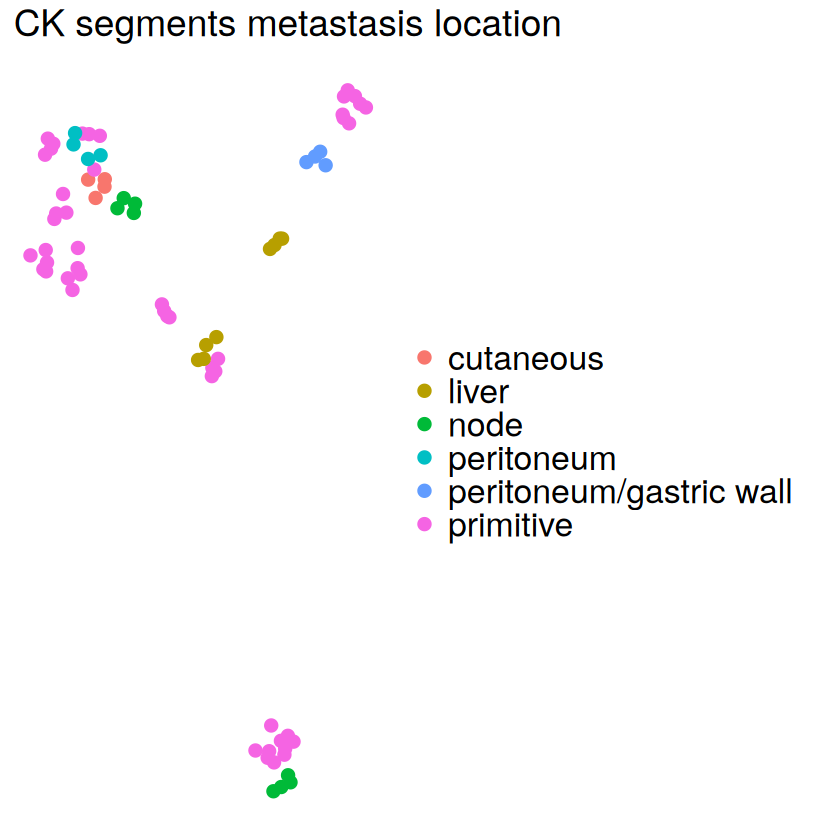

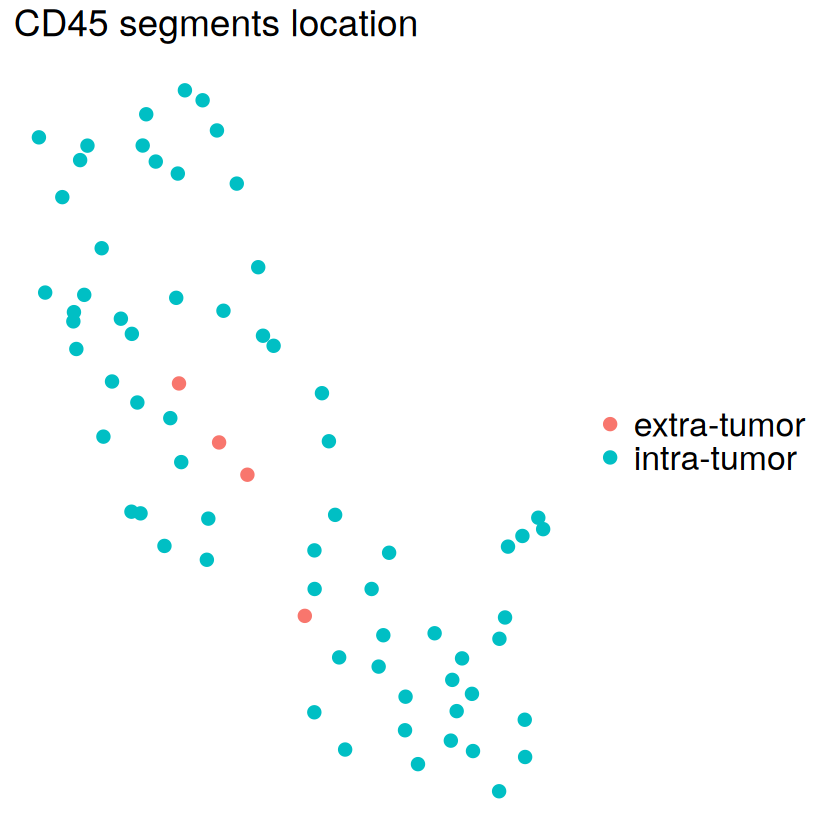

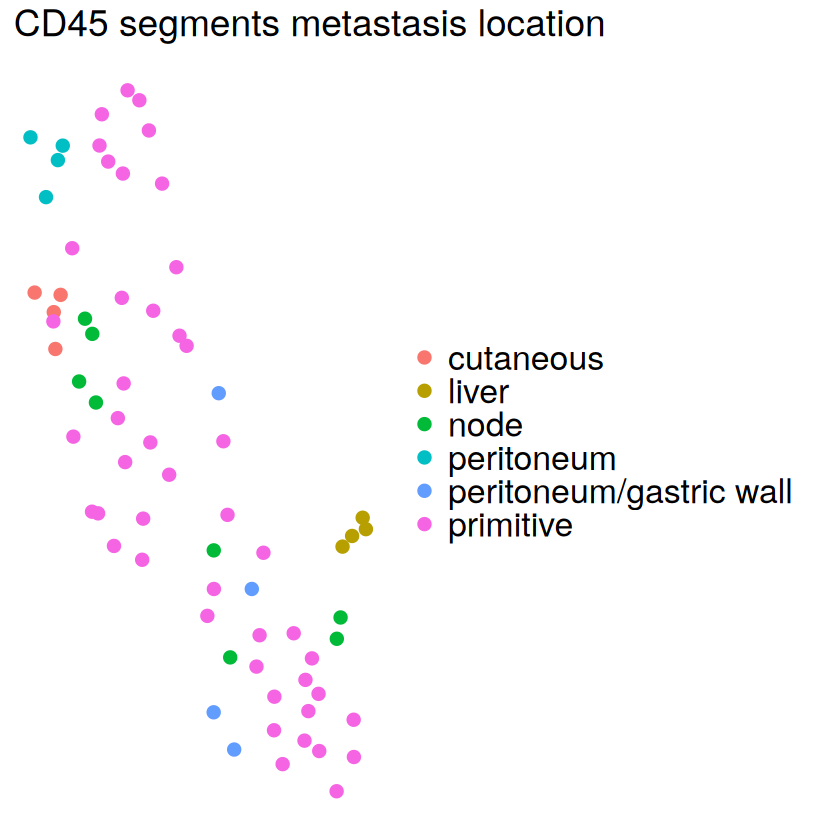

In [4]:
# General Umap
target_demoData <- run_umap(target_demoData)

umap_p <- umap_plot(target_demoData,"","segment",colors = segment_palette,label2="")
umap_p

umap_p <- umap_plot(target_demoData,"","patient_id")
umap_p

cd68_subset <- target_demoData[,pData(target_demoData)$segment == 'CD68']
cd68_subset <- run_umap(cd68_subset)
umap_plot(cd68_subset,"CD68 segment location","location")
umap_plot(cd68_subset,"CD68 segment metastasis location","metastasis_location")

ck_subset <- target_demoData[,pData(target_demoData)$segment == 'CK']
ck_subset <- run_umap(ck_subset)
umap_plot(ck_subset,"CK segments metastasis location","metastasis_location")

cd45_subset <- target_demoData[,pData(target_demoData)$segment == 'CD45']
cd45_subset <- run_umap(cd45_subset)
umap_plot(cd45_subset,"CD45 segments location","location")
umap_plot(cd45_subset,"CD45 segments metastasis location","metastasis_location")

# CK segments Uniquely Expressed Genes (UEGs) 

[1] "non CK" "CK"    
[1] "categories of column: CK non CK" "categories of column: CK CK"    
[1] 13148   235


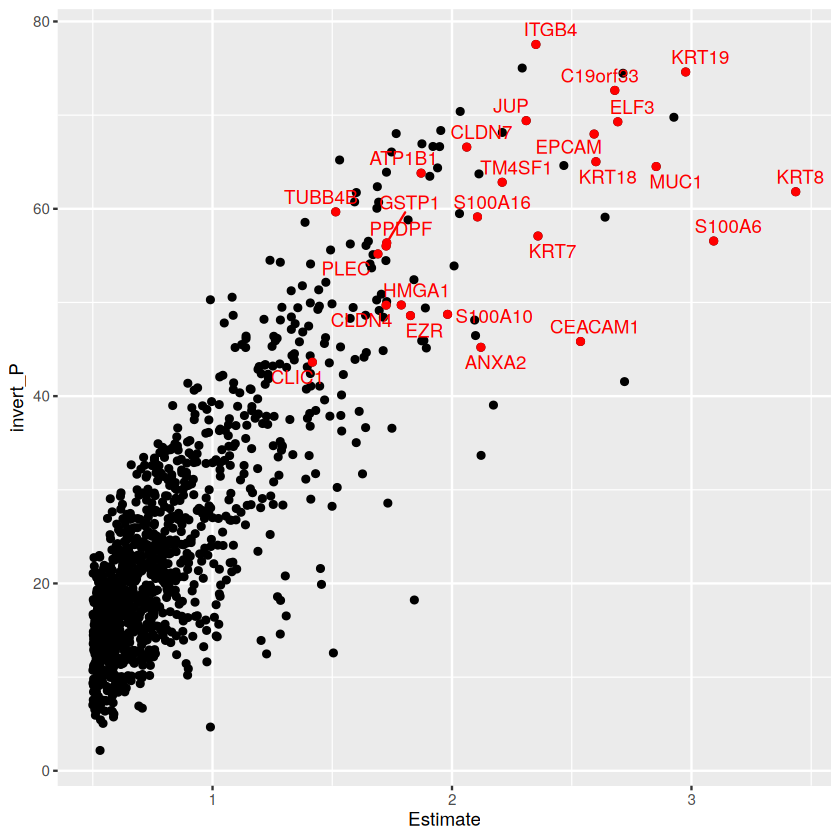

In [5]:
goi = c("MARCO", "CSF2RA", "MRC1", "ITGAM", "ADAM8", "CSF1R", "CD14", "CD68", "CD163", "FOLR2", "TREM2")
embryo = c("SLC14A1","VSIG4","BMP2","SOD3","CPNE8","C2","NID2","C4A","C4B","A4GALT","SYCP3","HLA-E","TIMD4","LYVE1","CX3CL1","CLEC4M","MARCO","EPOR","CD209","CHP2","CXCL13","HRH1","CD163","DMPK","ADAMTSL5","C6")
mono = c("SIRPG","SIRPB1","SIRPA","THBS1","TMEM38B","GDF3","TMEM26","MMP8","HNMT","HPSE","ACOD1","INHBA","DUSP2","CHIA","IL1RN","SPP1","SGMS2","SLFN12","SLFN12L","MEFV")

####### CK Uniquely Expressed Genes ########
pData(target_demoData)$CK <- ifelse(pData(target_demoData)$segment == 'CK','CK','non CK')
results = lmm_diff_expression(target_demoData,'CK',between = T,slide = F)

non_ck_ck <- subset(results[order(results$`Pr(>|t|)`, decreasing = FALSE),], `Pr(>|t|)` < 0.05 &  Estimate < -0.5 & Contrast == 'non CK - CK')
genes <- non_ck_ck$Gene
non_ck_ck$Expression <- rowMeans(assayDataElement(target_demoData[,pData(target_demoData)$segment == 'CK'][genes, ], elt = "q_norm"))
non_ck_ck$Estimate <- non_ck_ck$Estimate * (-1)
non_ck_ck$invert_P <- non_ck_ck$invert_P * (-1) 

x_quartiles <- quantile(non_ck_ck$Estimate, probs = c(0.9))
y_quartiles <- quantile(non_ck_ck$invert_P, probs = c(0.9))
z_quartiles <- quantile(non_ck_ck$Expression, probs = c(0.9))

extreme_ck <- subset(non_ck_ck[,c('Gene','Estimate','invert_P','Expression')], Estimate > x_quartiles & invert_P > y_quartiles & Expression > z_quartiles)

ggplot(non_ck_ck, aes(x = Estimate, y = invert_P)) +
geom_point() +
geom_point(data = extreme_ck,color = "red") +
geom_text_repel(data = extreme_ck, aes(label = Gene),color = "red")

diff_genes_pdac <- list(ck_ueg = extreme_ck$Gene)
##########################################

In [6]:
diff_genes_pdac

$ck_ueg
 [1] "ITGB4"    "KRT19"    "C19orf33" "JUP"      "ELF3"     "EPCAM"   
 [7] "CLDN7"    "KRT18"    "MUC1"     "ATP1B1"   "TM4SF1"   "KRT8"    
[13] "TUBB4B"   "S100A16"  "KRT7"     "S100A6"   "GSTP1"    "PPDPF"   
[19] "PLEC"     "HMGA1"    "CLDN4"    "S100A10"  "EZR"      "CEACAM1" 
[25] "ANXA2"    "CLIC1"

# Differential Expression Linear Mixed Effects model

## Each segment Primitive vs Metastasis 

[1] "CD68"
[1] "primitive"  "metastasis"
[1] "categories of column: primitive_metastasis primitive" 
[2] "categories of column: primitive_metastasis metastasis"
[1] 13148    89


Warning message in geom_text_repel(data = subset(df, Gene %in% top_g & FDR < 0.05 & :
“Ignoring unknown parameters: `linewidth`”


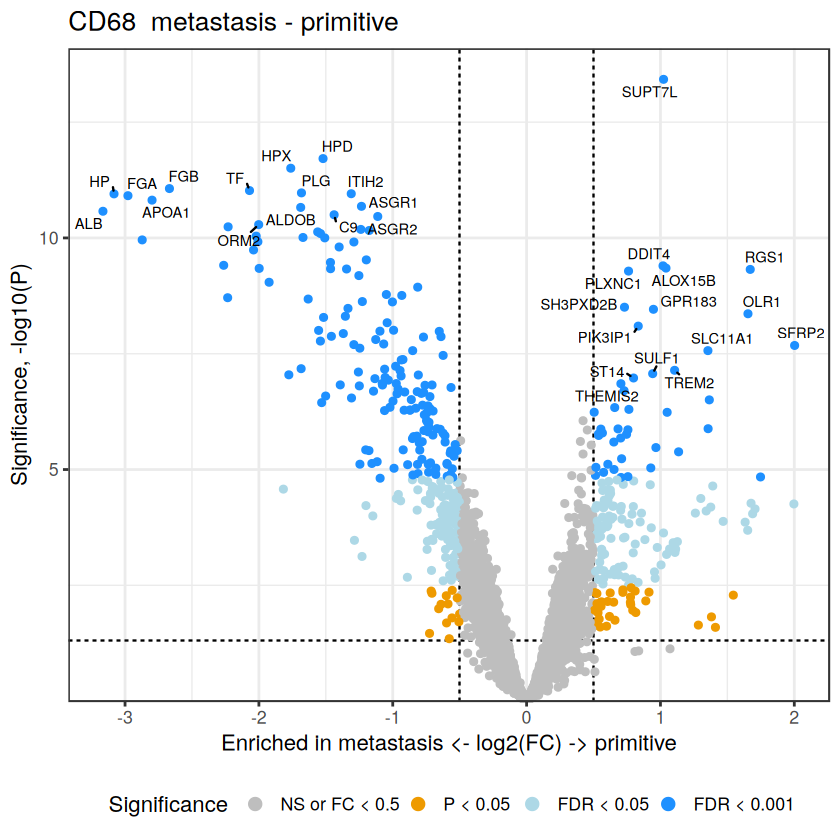

$mar
[1] 1.1 1.1 4.1 1.1

$xpd
[1] FALSE

$cex
[1] 1



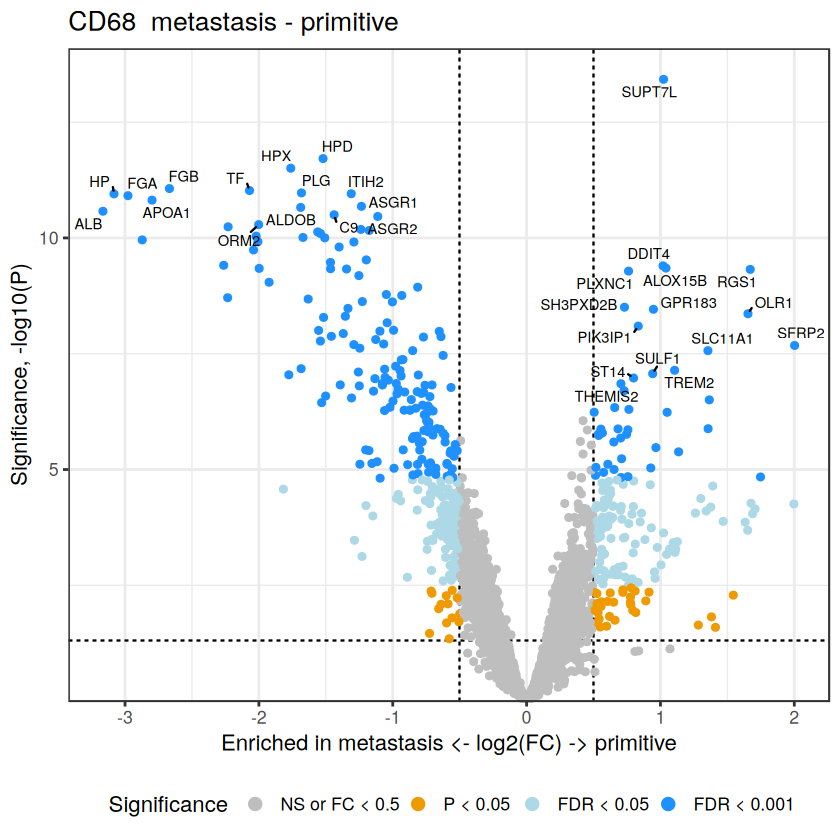

$mar
[1] 1.1 1.1 4.1 1.1

$xpd
[1] FALSE

$cex
[1] 1

[1] "CK"
[1] "primitive"  "metastasis"
[1] "categories of column: primitive_metastasis primitive" 
[2] "categories of column: primitive_metastasis metastasis"
[1] 13148    76


Warning message in geom_text_repel(data = subset(df, Gene %in% top_g & FDR < 0.05 & :
“Ignoring unknown parameters: `linewidth`”


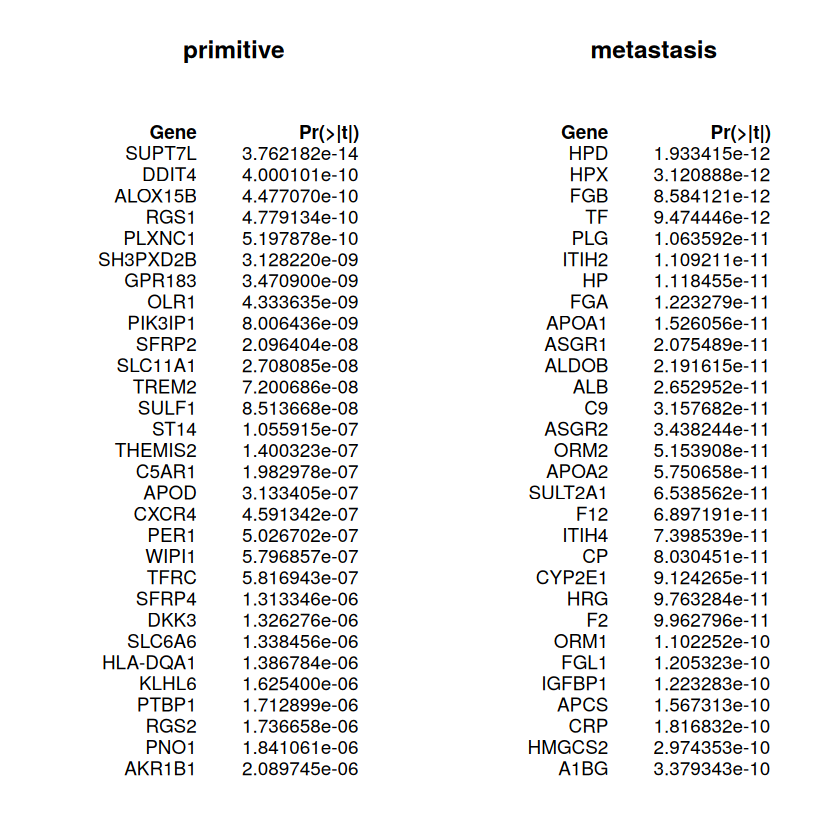

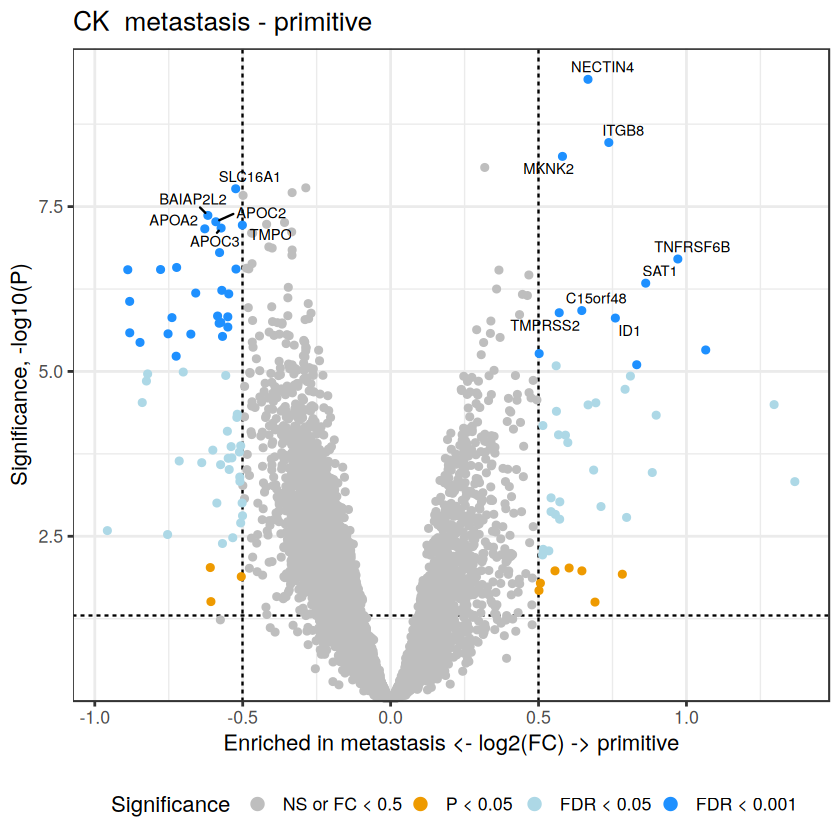

$mar
[1] 1.1 1.1 4.1 1.1

$xpd
[1] FALSE

$cex
[1] 1



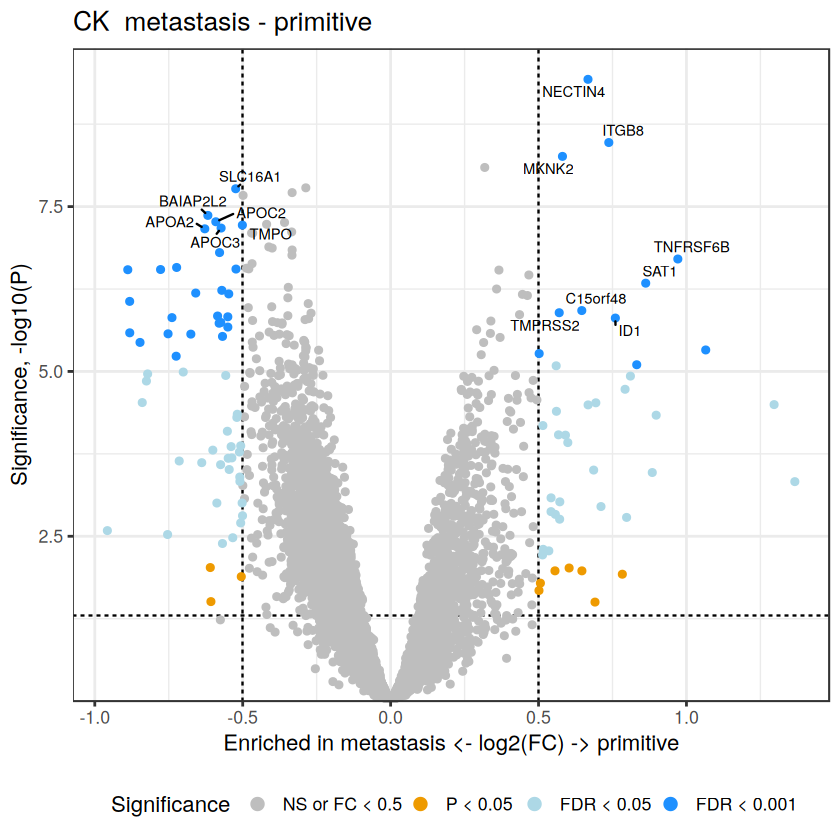

$mar
[1] 1.1 1.1 4.1 1.1

$xpd
[1] FALSE

$cex
[1] 1

[1] "CD45"
[1] "primitive"  "metastasis"
[1] "categories of column: primitive_metastasis primitive" 
[2] "categories of column: primitive_metastasis metastasis"
[1] 13148    70


Warning message in geom_text_repel(data = subset(df, Gene %in% top_g & FDR < 0.05 & :
“Ignoring unknown parameters: `linewidth`”


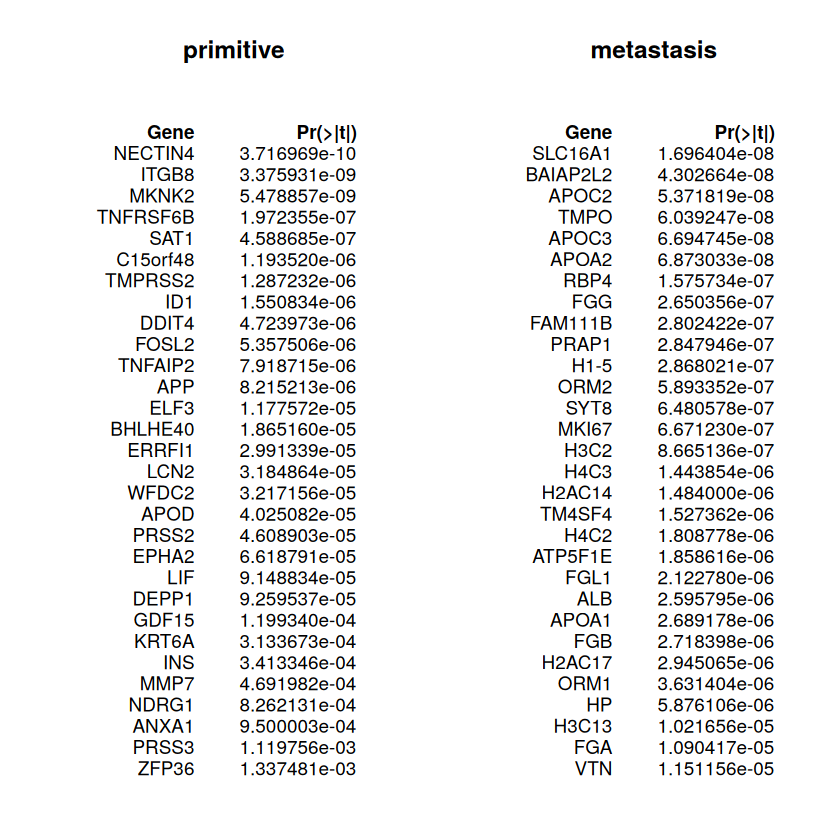

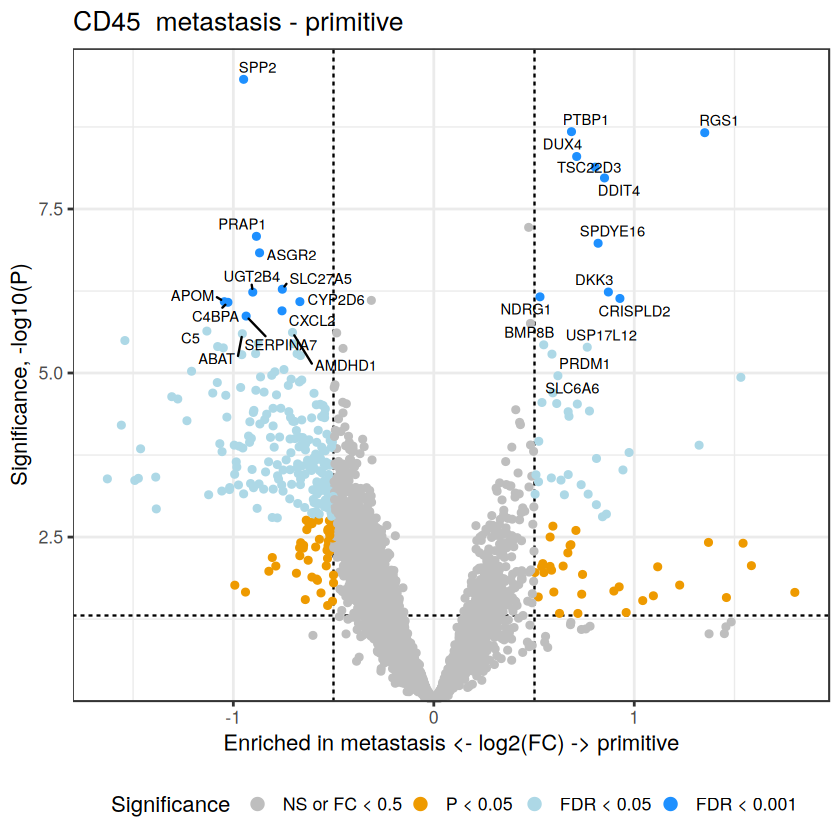

$mar
[1] 1.1 1.1 4.1 1.1

$xpd
[1] FALSE

$cex
[1] 1



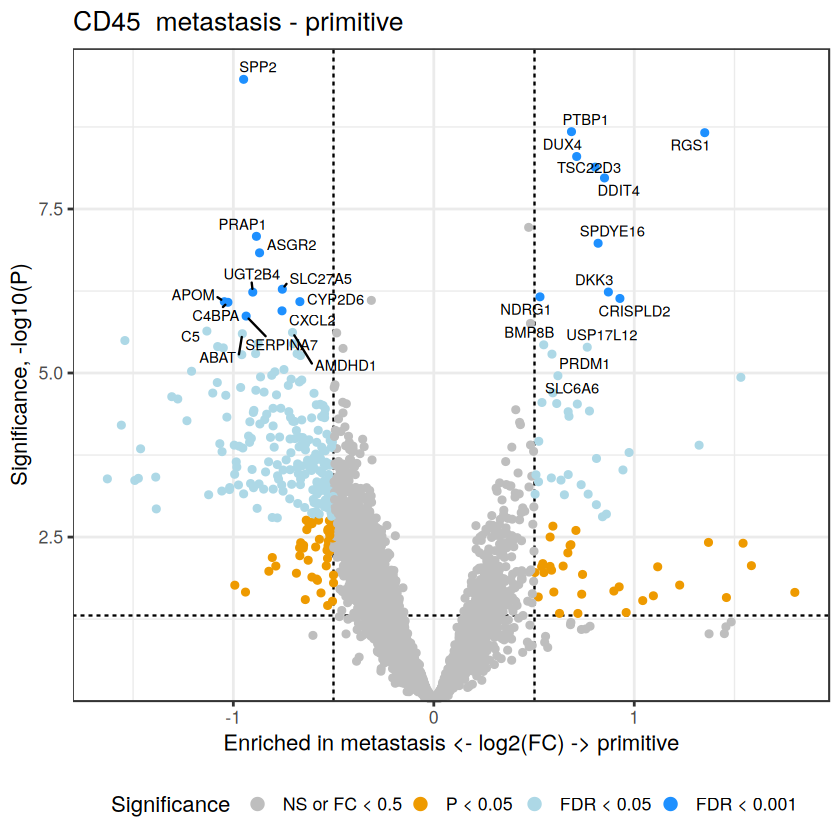

$mar
[1] 1.1 1.1 4.1 1.1

$xpd
[1] FALSE

$cex
[1] 1

$ck_ueg
 [1] "ITGB4"    "KRT19"    "C19orf33" "JUP"      "ELF3"     "EPCAM"   
 [7] "CLDN7"    "KRT18"    "MUC1"     "ATP1B1"   "TM4SF1"   "KRT8"    
[13] "TUBB4B"   "S100A16"  "KRT7"     "S100A6"   "GSTP1"    "PPDPF"   
[19] "PLEC"     "HMGA1"    "CLDN4"    "S100A10"  "EZR"      "CEACAM1" 
[25] "ANXA2"    "CLIC1"   

$`CD68  primitive`
 [1] "SUPT7L"  "DDIT4"   "ALOX15B" "RGS1"    "GPR183"  "OLR1"    "PIK3IP1"
 [8] "SFRP2"   "SLC11A1" "TREM2"   "SULF1"   "APOD"    "TFRC"    "SFRP4"  
[15] "LUM"     "MGP"     "CAPG"    "CELA3A"  "GM2A"    "COL1A1"  "PLA2G1B"

$`CD68  metastasis`
 [1] "HPD"    "HPX"    "FGB"    "TF"     "PLG"    "HP"     "FGA"    "APOA1" 
 [9] "ALDOB"  "ALB"    "ORM2"   "APOA2"  "ITIH4"  "CP"     "CYP2E1" "HRG"   
[17] "F2"     "ORM1"   "FGL1"   "CRP"    "SAA2"   "AMBP"  

$`CK  primitive`
 [1] "NECTIN4"  "ITGB8"    "TNFRSF6B" "SAT1"     "C15orf48" "ID1"     
 [7] "DDIT4"    "TNFAIP2"  "ELF3"     "BHLHE40"  "ERRFI1"  

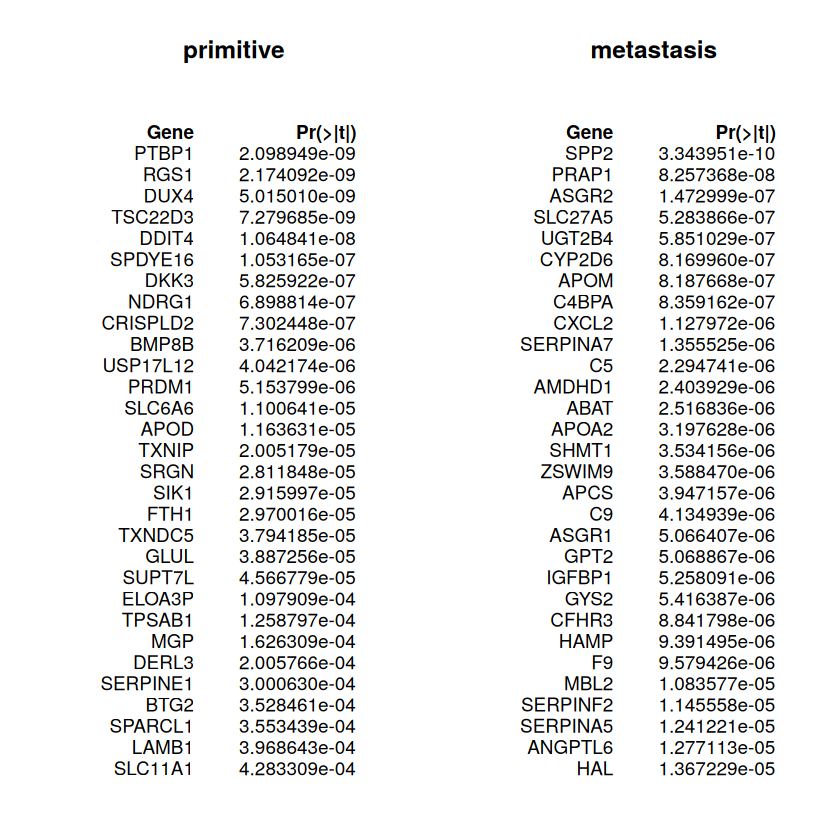

In [9]:
for (cell_type in list("CD68","CK","CD45")){
		print(cell_type)
		type_subset <- target_demoData[,pData(target_demoData)$segment == cell_type ]
        # print(1)
		title <- paste(cell_type, ' metastasis - primitive')
		if (cell_type == "CD68"){
            # print(2)
			results <- lmm_diff_expression(type_subset,"primitive_metastasis",between=TRUE,slide = F)
    		p1 = 0.5
			p2 = 0.5
			p3 = 0.5
		}
		if (cell_type == "CD45"){
			results <- lmm_diff_expression(type_subset,"primitive_metastasis",between=TRUE,slide = F)
			# kable(head(results))
			p1 = 0.5
			p2 = 0.5
			p3 = 0.5
		}
		if (cell_type == "CK"){
			results <- lmm_diff_expression(type_subset,"primitive_metastasis",between=TRUE,slide = F)
			kable(head(results))
			p1 = 0.5
			p2 = 0.5
			p3 = 0.5
		}
        res <- extreme_genes(results,20)
		# res <- expressions(results,type_subset,p1,p2,p3)
		diff_genes_pdac[[paste(cell_type,' primitive')]] <- res$pos
		diff_genes_pdac[[paste(cell_type,' metastasis')]] <- res$neg
		volcano <- volcano_plot(results,"primitive - metastasis",title)
		print(volcano)
		primitive <- subset(results[order(results$`Pr(>|t|)`, decreasing = FALSE),], `Pr(>|t|)` < 0.05 & Estimate > 0.5)[,c('Gene',"Pr(>|t|)")]
		metastasis <- subset(results[order(results$`Pr(>|t|)`, decreasing = FALSE),], `Pr(>|t|)` < 0.05 & Estimate < -0.5)[,c('Gene',"Pr(>|t|)")]
		# diff_genes_pdac <- c(diff_genes_pdac,list(names(expressions)))
		par(mfrow = c(1, 2))
		p1 <- textplot(head(primitive,30), valign="top",show.rownames = F)
		print(p1)
		title("primitive")
		p2 <- textplot(head(metastasis,30), valign="top",show.rownames = F)
		print(p2)
		title("metastasis")
		par(mfrow = c(1, 1))
	}
print(diff_genes_pdac)

## CD68 Primitive segments High vs Low proximity to tumor

In [ ]:
geomx_subset  <- target_demoData[,pData(target_demoData)$segment == 'CD68' & pData(target_demoData)$primitive_metastasis == 'primitive']
results <- lmm_diff_expression(geomx_subset,"ck_score_cat",between=TRUE,slide = F)

results <- results[results$Contrast =='low - high',]
results <- results[order(results$FDR,decreasing = F),]
high_degs <- results[results$Estimate < -0.5 & results$`Pr(>|t|)` < 0.05,]$Gene
low_degs <- results[results$Estimate > 0.5 & results$`Pr(>|t|)` < 0.05,]$Gene

volcano_plot(
            results,
            "low - high",
            title = 'Primary CD68 high - low ',
            goi1=extreme_genes(results,20)$pos,
            goi2=extreme_genes(results,20)$neg
            )

perform_pathway_analysis(extreme_genes(results,50)$pos,plot_title = 'high')
perform_pathway_analysis(extreme_genes(results,50)$neg,plot_title = 'low')

GOI <- c(extreme_genes(results,30)$pos,extreme_genes(results,30)$neg)
data <- log2(assayDataElement(geomx_subset[GOI, ], elt = "q_norm"))
data <- data[,order(pData(geomx_subset)$ck_score)]
pheatmap(data,
         scale = "row", 
         show_rownames = T, show_colnames = FALSE,
         border_color = NA,
         cluster_cols = F, cluster_rows =F,
         # gaps_col = c(28), gaps_row = c(length(primitive_degs)),
         # cutree_cols = 2, cutree_rows = 2,
         treeheight_row =0,treeheight_col = 0,
         breaks = seq(-3, 3, 0.05),
         legend = F, annotation_legend = T, annotation_names_row =T,fontsize_row=6, fontsize=5,
         color = colorRampPalette(c("navy",'white',"red"))(120),
         annotation_col = pData(geomx_subset)[c('primitive_metastasis','patient_id','metastasis_location','ck_score')])

## CD68 high tumor proximity (tumoral) segments Prim vs Meta

In [ ]:
geomx_subset  <- target_demoData[,pData(target_demoData)$segment == 'CD68' & pData(target_demoData)$ck_score > 0.2] # proximity score of ck to cd68 segments above 20% 
results <- lmm_diff_expression(geomx_subset,"primitive_metastasis",between=TRUE,slide = F)

results <- results[results$Contrast =='primitive - metastasis',]
results <- results[order(results$FDR,decreasing = F),]

volcano_plot(results,"primitive - metastasis",
             title = "Primary CD68 primitive - metastasis",
             goi1=extreme_genes(results,20)$pos,
             goi2=extreme_genes(results,20)$neg
            )

perform_pathway_analysis(extreme_genes(results,50)$pos,plot_title = 'primitive tumoral DEGs ontologies')
perform_pathway_analysis(extreme_genes(results,50)$neg,plot_title = 'metastasis tumoral DEGs ontologies')

GOI <- c(extreme_genes(results,30)$pos,extreme_genes(results,30)$neg)
data <- log2(assayDataElement(geomx_subset[GOI, ], elt = "q_norm"))
data <- data[,order(pData(geomx_subset)$primitive_metastasis)]
pheatmap(data,
         scale = "row", 
         show_rownames = T, show_colnames = FALSE,
         border_color = NA,
         cluster_cols = F, cluster_rows =F,
         # gaps_col = c(28), gaps_row = c(length(primitive_degs)),
         # cutree_cols = 2, cutree_rows = 2,
         treeheight_row =0,treeheight_col = 0,
         breaks = seq(-3, 3, 0.05),
         legend = F, annotation_legend = T, annotation_names_row =T,fontsize_row=6, fontsize=5,
         color = colorRampPalette(c("navy",'white',"red"))(120),
         annotation_col = pData(geomx_subset)[c('primitive_metastasis','patient_id','metastasis_location','ck_score','stage','treatment_duration_months')])

# EdgeR differential expression analysis

## CD68 Prim-Meta Tumoral DEG

In [ ]:
library(stringr)
cd68_subset  <- target_demoData[,pData(target_demoData)$segment == 'CD68']

matrix <- assayData(cd68_subset)[["exprs"]]
meta_cd68 <- pData(cd68_subset)

meta_cd68$ck_score_cat[is.na(meta_cd68$ck_score_cat)] <-'adjacent' # replace NA values with 'Adjacent' in the score_cat column

slide <- sapply(strsplit(meta_cd68$`slide name`, " "), "[", 1) # take the first word of the slide name
slide <- factor(str_replace_all(slide, "\\.|-| |#", "_")) # replace special chars with underscore
patient <- factor(str_replace_all(meta_cd68$patient_id, "\\.|-| ", "_"))
prim_meta <- factor(meta_cd68$primitive_metastasis)
location <- factor(meta_cd68$metastasis_location)

meta_cd68$cd68_type <- NA
meta_cd68$cd68_type = ifelse(meta_cd68$ck_score_cat %in% c('mid','high'),'tumoral',NA)
indices <- which(meta_cd68$cd68_type == 'tumoral')
cd68_tumoral_samples = rownames(meta_cd68[indices,])
table(meta_cd68$patient_id)

y = DGEList(counts = matrix[,cd68_tumoral_samples],samples = meta_cd68[cd68_tumoral_samples,])

# Filter low-expressed genes
keep <- filterByExpr(y)
y <- y[keep, , keep.lib.sizes = FALSE]
# Normalize data
y <- calcNormFactors(y)
# Check metadata
design <- model.matrix(~patient_id + primitive_metastasis, data = meta_cd68[meta_cd68$cd68_type == 'tumoral', ])
# Print design matrix column names to verify
print(colnames(design))
# Estimate dispersion
y <- estimateDisp(y, design, robust = TRUE)
print(y$common.dispersion)
# Fit the model
fit <- glmQLFit(y, design, robust = TRUE)
contrast <- rep(0, ncol(design))
contrast[grep("primitive_metastasis", colnames(design))] <- 1  # Set the contrast for primitive_metastasis
# Perform quasi-likelihood F-test
qlf <- glmQLFTest(fit, contrast = contrast)
# Summarize results
# summary(decideTests(qlf))
# Extract top differentially expressed genes
top_degs <- topTags(qlf, n = 10)
print(top_degs)
# Extract all results
results <- topTags(qlf, n = Inf)$table

results <- topTags(qlf,n=Inf)$table
results$FDR <- p.adjust(results$PValue, method="BH")
primitive_degs <-rownames(results[results$logFC > 0.5 & results$FDR < 0.05,])
negative_degs <- rownames(results[results$logFC < -0.5 & results$FDR < 0.05,])
extremes <- extreme_genes_edger(results,20)

plots <- list()
plots[[1]] <- plot_ontology(negative_degs,'metastasis')
plots[[2]] <- volcano_edger(results,left = 'metastasis',right = 'primitive',title = 'CD68 tumoral: primitive - metastasis',extremes$pos,extremes$neg)
plots[[3]] <- plot_ontology(primitive_degs,'primitive')
options(repr.plot.width=20, repr.plot.height=8)
grid.arrange(grobs = plots, ncol = 3)

options(repr.plot.width=9, repr.plot.height=7)
GOI <- c(extremes$pos,extremes$neg)
extremes$pos
logcpm <-cpm(y,log=TRUE)
data <- logcpm[GOI,]
column_order <- order(meta_cd68[colnames(data), "primitive_metastasis"], meta_cd68[colnames(data), "ck_score"], decreasing = c(F))
data <- data[,column_order]
dim(data)
pheatmap(data,
         scale = "row", 
         show_rownames = T, show_colnames = F,
         border_color = NA,
         #clustering_method = "average",
         #clustering_distance_rows = "correlation",
         cluster_cols = F, cluster_rows =F,
         gaps_col = c(15), gaps_row = c(20),
         cutree_cols = 2, cutree_rows = 2,
         treeheight_row =0,treeheight_col = 0,
         breaks = seq(-3, 3, 0.05),
         legend = F, annotation_legend = T, annotation_names_row =T,fontsize_row=6, fontsize=6,
         color = colorRampPalette(c("navy",'white',"red"))(120),
         annotation_col = meta_cd68[c('primitive_metastasis','ck_score','patient_id','metastasis_location')]
        )

## impact of macrophage proximity on tumor segments (continuous case)

In [ ]:
ck_subset <- target_demoData[, pData(target_demoData)$segment == 'CK']

matrix <- assayData(ck_subset)[["exprs"]]
metadata <- pData(ck_subset)

y = DGEList(counts = matrix,samples = metadata)

keep <- filterByExpr(y)
y <- y[keep, , keep.lib.sizes=FALSE]
y <- calcNormFactors(y)
X <- poly(metadata[,'cd68_score'], degree = 3)

design <- model.matrix(~patient_id  +  X, data = metadata)

rownames(design) <- colnames(y)

print(colnames(design))

y <- estimateDisp(y,design)
print(y$common.dispersion)
options(repr.plot.width=15, repr.plot.height=5)
par(mfrow = c(1, 3))
plotMDS(y,labels = metadata$patient_id)
plotBCV(y)
fit <- glmQLFit(y,design,robust=T)
plotQLDisp(fit)
test <- glmQLFTest(fit,coef=7:9)

# Extract results from glmQLFTest
results <- topTags(test, n = Inf)$table

# Filter for significant genes (e.g., FDR < 0.05)
significant_results <- results[results$FDR < 0.05, ]
# significant_results

# summary(decideTests(test))

logCPM.obs <- cpm(y, log=TRUE, prior.count=test$prior.count)
logCPM.test <- cpm(test, log=TRUE)

results = list()
for (i in 1:nrow(significant_results)) {
        Symbol <- row.names(significant_results)[i]
        logCPM.obs.i <- logCPM.obs[Symbol,]
        logCPM.test.i <- logCPM.test[Symbol,]
        df_ <- data.frame(obs=logCPM.obs.i,test=logCPM.test.i,score_cat=metadata$cd68_score_cat,score =metadata$cd68_score)
        df_$score_bin <- cut(df_$score, breaks = seq(min(df_$score), max(df_$score), by = 10), include.lowest = TRUE)
        new_df <- aggregate(cbind(obs,test) ~ score_bin, data = df_, FUN = mean)
        new_df$index <- 1:nrow(new_df)
                  
        lm_model = lm(obs ~ index,data=new_df)
        r_squared <- summary(lm_model)$r.squared
        coeff <- lm_model$coefficients[2]

        results[[i]] <- list(
            dataframe = new_df,
            name = Symbol,
            r_squared = r_squared,
            coeff = coeff
            )
}
positive_results <- results[sapply(results, function(x) x$coeff > 0)]
negative_results <- results[sapply(results, function(x) x$coeff < 0)]

# Sort positive results: by r_squared (descending) and then coeff (descending)
positive_results <- positive_results[order(
  -sapply(positive_results, function(x) x$r_squared),
  -sapply(positive_results, function(x) x$coeff)
)]

# Sort negative results: by r_squared (descending) and then |coeff| (descending)
negative_results <- negative_results[order(
  -sapply(negative_results, function(x) x$r_squared),
  -sapply(negative_results, function(x) abs(x$coeff))
)]

options(repr.plot.width=20, repr.plot.height=20)
par(mfrow=c(1,10))
options(warn=-1)
positives <- c()
negatives <- c()
positive_count = 0
negative_count = 0
positive_plots <- list()
negative_plots <- list()
for (i in 1:20) {
    df_pos <- positive_results[[i]]$dataframe
    Symbol_pos <- positive_results[[i]]$name
    positives[i] <- Symbol_pos

    suppressMessages(
        p <- ggplot(df_pos, aes(x = index, y = obs,group=1)) +
            geom_point() +
            geom_smooth(aes(y=test), se = FALSE,color ='red')+
            theme_bw() + theme(plot.title = element_text(hjust = 0.5),panel.grid.major = element_blank(),panel.grid.minor = element_blank()) +
            labs(x = "score", y = "logCPM", title = Symbol_pos) 
    )
    positive_plots[[i]] <- p
    
    df_neg <- negative_results[[i]]$dataframe
    Symbol_neg <- negative_results[[i]]$name
    negatives[i] <- Symbol_neg

    suppressMessages(
        n <- ggplot(df_neg, aes(x = index, y = obs,group=1)) +
            geom_point() +
            geom_smooth(aes(y=test), se = FALSE,color ='red')+
            theme_bw() + theme(plot.title = element_text(hjust = 0.5),panel.grid.major = element_blank(),panel.grid.minor = element_blank()) +
            labs(x = "score", y = "logCPM", title = Symbol_neg) 
    )
    negative_plots[[i]] <- n
}
positive_plots <- Filter(Negate(is.null), positive_plots)
suppressMessages(do.call(grid.arrange, positive_plots))

negative_plots <- Filter(Negate(is.null), negative_plots)
suppressMessages(do.call(grid.arrange, negative_plots))

options(repr.plot.width=9, repr.plot.height=7)
GOI <- c(positives,negatives)
# GOI
logcpm <-cpm(y,log=TRUE)
data <- logcpm[GOI,]
column_order <- order(metadata[colnames(data), "cd68_score"], metadata[colnames(data), "cd68_score_cat"], decreasing = c(F))
data <- data[,column_order]
dim(data)
pheatmap(data,
         scale = "row", 
         show_rownames = T, show_colnames = F,
         border_color = NA,
         #clustering_method = "average",
         #clustering_distance_rows = "correlation",
         cluster_cols = F, cluster_rows =F,
#          gaps_col = c(15), gaps_row = c(20),
         cutree_cols = 2, cutree_rows = 2,
         treeheight_row =0,treeheight_col = 0,
         breaks = seq(-3, 3, 0.05),
         legend = F, annotation_legend = T, annotation_names_row =T,fontsize_row=6, fontsize=6,
         color = colorRampPalette(c("navy",'white',"red"))(120),
         annotation_col = metadata[c('cd68_score_cat','cd68_score','primitive_metastasis','patient_id','metastasis_location')]
        )

perform_pathway_analysis(positives,plot_title = 'Pathways related to proximity with macrophage')
perform_pathway_analysis(negatives, plot_title = 'Pathways inversely related to proximity with macrophage')